In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
from utils import *
pd.set_option('max_column', 100)

In [2]:
# Plotly functions
def return_one_trace(loc_count, size, color, text):
    loc_count['name'] = [a+'<br>'+b+'<br>'+color.title()+': '+str(round(c, 2)) \
                     for a,b,c, in zip(loc_count['bike_label'],
                                       loc_count['ped_label'], 
                                       loc_count[color])]
    trace = go.Scattermapbox(
        lat=loc_count['latitude'],
        lon=loc_count['longitude'],
        mode='markers',
        marker=dict(
            size=loc_count[size]*5,
            color=loc_count[color],
            colorbar=dict(thickness=20)
        ),
        text=loc_count[text],
    )
    return trace

def plot_with_colorbar(loc_count, size, color, text, zoom = 10.1):
    loc_count['name'] = [a+'<br>'+b+'<br>'+color.title()+': '+str(round(c, 2)) \
                     for a,b,c, in zip(loc_count['bike_label'],
                                       loc_count['ped_label'], 
                                       loc_count[color])]
    data = [
        go.Scattermapbox(
            lat=loc_count['latitude'],
            lon=loc_count['longitude'],
            mode='markers',
            marker=dict(
                size=loc_count[size]*5,
                color=loc_count[color],
                colorbar=dict(thickness=20)
            ),
            text=loc_count[text],
        )
    ]
    layout = go.Layout(
        autosize=True,
        hovermode='closest',
        mapbox=dict(
            accesstoken=mapbox_access_token,
            bearing=0,
            center=dict(
                lat= (np.max(loc_count['latitude']) + np.min(loc_count['latitude']))/2,
                lon= (np.max(loc_count['longitude']) + np.min(loc_count['longitude']))/2
            ),
            pitch=0,
            zoom=10.1
        ),
    )
    fig = dict(data=data, layout=layout)
    return fig

In [3]:
# This is only a one-time set up!!!!!
# import plotly
# plotly.tools.set_credentials_file(username='zihaoxu', api_key='UUEKSL35OteiSutHDAY1')

In [4]:
mst_path = '/Users/zihaoxu/R_repos/BikeSGV/datasets/mst/'
fig_path = '/Users/zihaoxu/R_repos/BikeSGV/export/02_summary_stats_ped/'

In [5]:
ped = pd.read_csv(mst_path + 'clean_ped.csv')
ped.head(2)

,intervalid,location_id,street1,street2,street3,latitude,longitude,date,weekday,period_begin,period_end,interval_begin,ns,sn,ew,we,specialneeds,skate,child,count_method,raining,unusual,bikewaytype,bikewaytype_options,road_class,speed_limit,landuse,pk_dataset_id,city,createdatetime,total_count,female,cane,dog,on_street
0,17560.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:00 AM,0,0,4,7,0,1,2.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,11,0.0,0.0,0.0,0.0
1,17561.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:15 AM,0,0,0,0,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,0,0.0,0.0,0.0,0.0


In [6]:
bike = pd.read_csv(mst_path + 'clean_bike.csv')
bike.head(2)

,intervalid,location_id,street1,street2,street3,latitude,longitude,date,weekday,period_begin,period_end,interval_begin,ns,sn,ew,we,female,sidewalk,wrongway,count_method,count_bikesonsidewalks,raining,unusual,bikewaytype,bikewaytype_options,road_class,speed_limit,landuse,pk_dataset_id,city,createdatetime,total_count,no_helmet,child
0,19203.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:00 AM,0,0,0,1,0,0,1.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,1,0
1,19204.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:15 AM,0,0,1,0,0,0,0.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,0,0


In [7]:
ped_loc_count = ped.groupby('location_id').agg(['mean'])['total_count'].reset_index()
ped_loc_count['ped_label'] = ['Ped. Count: ' + str(round(s,3)) for s in ped_loc_count['mean']]
ped_loc_count = ped_loc_count.rename(columns = {'mean':'ped_mean'})
print(ped_loc_count.shape)
ped_loc_count.head()

(106, 3)


,location_id,ped_mean,ped_label
0,1025.0,4.791667,Ped. Count: 4.792
1,1030.0,3.325000,Ped. Count: 3.325
2,1245.0,8.666667,Ped. Count: 8.667
3,1368.0,10.916667,Ped. Count: 10.917
4,1375.0,4.875000,Ped. Count: 4.875


In [8]:
bike_loc_count = bike.groupby(['city', 'location_id', 'longitude', 'latitude']).agg(['mean'])['total_count'].reset_index()
bike_loc_count['bike_label'] = ['Bike Count: ' + str(round(s,3)) for s in bike_loc_count['mean']]
bike_loc_count = bike_loc_count.rename(columns = {'mean':'bike_mean'})
print(bike_loc_count.shape)
bike_loc_count.head()

(112, 6)


,city,location_id,longitude,latitude,bike_mean,bike_label
0,Altadena,1551.0,-118.113507,34.169051,0.541667,Bike Count: 0.542
1,Altadena,1554.0,-118.098393,34.169834,0.833333,Bike Count: 0.833
2,Altadena,1569.0,-118.111557,34.169035,0.583333,Bike Count: 0.583
3,Altadena,1593.0,-118.159145,34.189121,1.208333,Bike Count: 1.208
4,Altadena,1622.0,-118.168809,34.185666,3.041667,Bike Count: 3.042


In [9]:
interesting_cols = ['female', 'sidewalk', 'wrongway', 'no_helmet', 'child']
bike_info = bike.groupby('location_id').sum().reset_index()[['location_id', 'female', 'sidewalk', 'wrongway', 'no_helmet', 'child', 'total_count']]
for col in interesting_cols:
    bike_info[col] = bike_info[col]/bike_info['total_count']
bike_info = bike_info.fillna(0).drop(['total_count'], 1)
bike_info.head()

,location_id,female,sidewalk,wrongway,no_helmet,child
0,1025.0,0.000000,0.409091,0.090909,0.681818,0.090909
1,1030.0,0.044776,0.716418,0.029851,0.761194,0.059701
2,1245.0,0.094340,0.490566,0.000000,0.867925,0.188679
3,1368.0,0.117647,0.500000,0.088235,0.617647,0.000000
4,1373.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
loc_count = pd.merge(ped_loc_count, bike_loc_count, on = 'location_id', how = 'inner')
loc_count = pd.merge(loc_count, bike_info, on = 'location_id', how = 'inner')
loc_count['bike_ratio'] = loc_count['bike_mean'] / (loc_count['ped_mean'] + loc_count['bike_mean'])
print(loc_count.shape)
loc_count.head(2)

(111, 14)


,location_id,ped_mean,ped_label,city,longitude,latitude,bike_mean,bike_label,female,sidewalk,wrongway,no_helmet,child,bike_ratio
0,1025.0,4.791667,Ped. Count: 4.792,SEM,-118.039993,34.035943,0.916667,Bike Count: 0.917,0.000000,0.409091,0.090909,0.681818,0.090909,0.160584
1,1030.0,3.325000,Ped. Count: 3.325,SEM,-118.032415,34.043525,1.791667,Bike Count: 1.792,0.044776,0.716418,0.029851,0.761194,0.059701,0.350163


In [11]:
# ??go.Scattermapbox

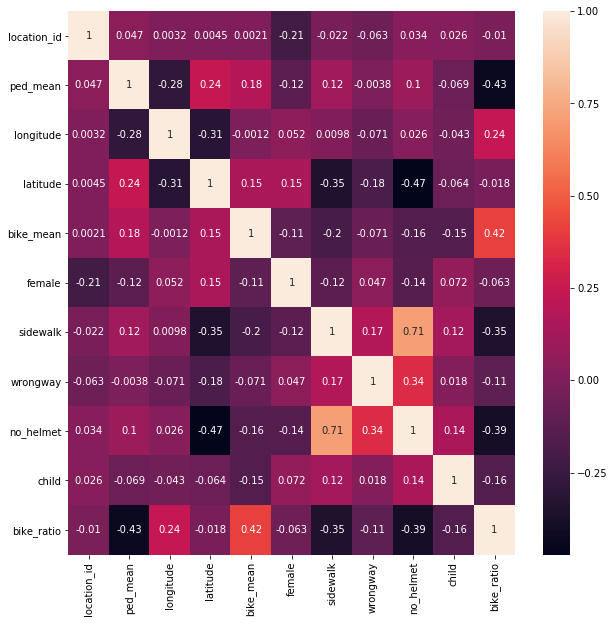

In [12]:
plt.figure(figsize = (10,10))
sns.heatmap(loc_count.corr(), annot = True)

In [13]:
loc_count.sort_values('bike_ratio').head()[['location_id', 'city', 'bike_ratio']]

,location_id,city,bike_ratio
49,1547.0,Pasadena,0.024900
25,1474.0,Pasadena,0.029920
50,1551.0,Altadena,0.033766
76,1602.0,Arcadia,0.038310
5,1376.0,Glendora,0.044983


In [14]:
# Pull traces to data
data = [return_one_trace(loc_count, 'bike_mean', col, 'name') for col in ['bike_ratio'] + interesting_cols]    
['bike_ratio'] + interesting_cols

['bike_ratio', 'female', 'sidewalk', 'wrongway', 'no_helmet', 'child']

In [15]:
# Specify dropout parameters
updatemenus = list([
    dict(active=-1,
         buttons=list([   
            dict(label = "Bike Ratio",
                 method = "update",
                 args = [{"visible": [True, False, False, False, False, False]},
                         {"title": "Bike Ratio"}]),
            dict(label = "Female Riding Ratio",
                 method = "update",
                 args = [{"visible": [False, True, False, False, False, False]},
                         {"title": "Female Riding Ratio"}]),
            dict(label = "Sidewalk Riding Ratio",
                 method = "update",
                 args = [{"visible": [False, False, True, False, False, False]},
                         {"title": "Sidewalk Riding Ratio"}]),
            dict(label = "Wrongway Riding Ratio",
                 method = "update",
                 args = [{"visible": [False, False, False, True, False, False]},
                         {"title": "Wrongway Riding Ratio"}]),
            dict(label = "No Helmet Riding Ratio",
                 method = "update",
                 args = [{"visible": [False, False, False, False, True, False]},
                         {"title": "No Helmet Riding Ratio"}]),
            dict(label = "Child Riding Ratio",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, True]},
                         {"title": "Child Riding Ratio"}]),
            dict(label = "Reset",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False]},
                         {"title": "Reset"}])
        ]),
    )
])
# Set layout
layout = dict(showlegend=False,
              updatemenus=updatemenus,
                     autosize=True,
            hovermode='closest',
            mapbox=dict(
                accesstoken=mapbox_access_token,
                bearing=0,
                center=dict(
                    lat= (np.max(loc_count['latitude']) + np.min(loc_count['latitude']))/2,
                    lon= (np.max(loc_count['longitude']) + np.min(loc_count['longitude']))/2
                ),
                pitch=0,
                zoom=10.1),
             )
# Create fig
fig = dict(data=data, layout=layout)
# Plot the plotly plot
py.iplot(fig, filename="Average Bike Count Colored with Params")

In [16]:
# Old code

# fig = plot_with_colorbar(loc_count, 
#                          size = 'bike_mean', 
#                          color = 'bike_ratio',
#                          text = 'name')
# py.iplot(fig, filename = 'Average Bike Counts (per 15-minute Interval) Colored with Bike Ratio')
# for col in interesting_cols:
#     fig = plot_with_colorbar(loc_count, 
#                              size = 'bike_mean', 
#                              color = col,
#                              text = 'name')
#     py.iplot(fig, filename = 'Bike Counts Colored with ' + col.title() + ' Ratio')

## View output: https://plot.ly/~zihaoxu/